🔍 Missing Values Summary (isna()):
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

✅ Non-missing value check (notna()):
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64
   Sales  Sales_Normalized  Unit  Unit_Normalized
0  20000          0.095238     8         0.095238
1  20000          0.095238     8         0.095238
2  10000          0.031746     4         0.031746
3  37500          0.206349    15         0.206349
4   7500          0.015873     3         0.015873
Sales Statistics:
Mean: 45013.56
Median: 35000.00
Mode: 22500.00
Std_Dev: 32253.51

Unit Statistics:
Mean: 18.01
Median: 14.00
Mode: 9.00
Std_Dev: 12.90
Total Sales by Group:
       Group     Sales
0      Kids  85072500
1       Men  85750000
2   Seniors  84037500
3     Women  85442500

Group with Highest Sales:
Group         Men
Sales    85750000
Name: 1, dtype: object

Group with Lowest Sales:
Group     Seniors
Sales    84037500
Name: 2, dtype: o

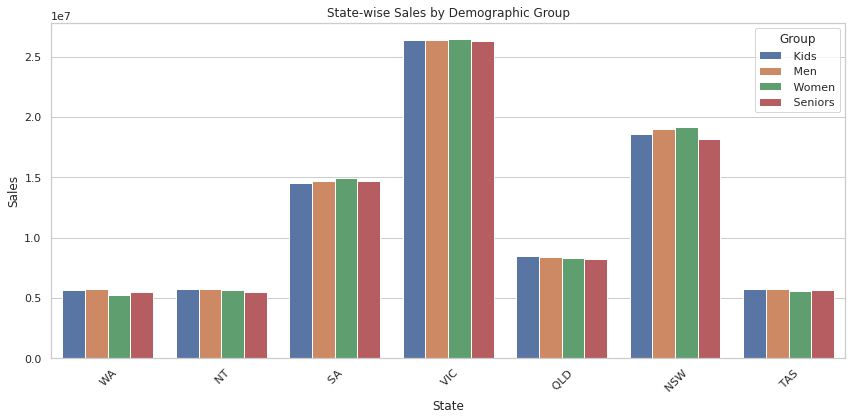

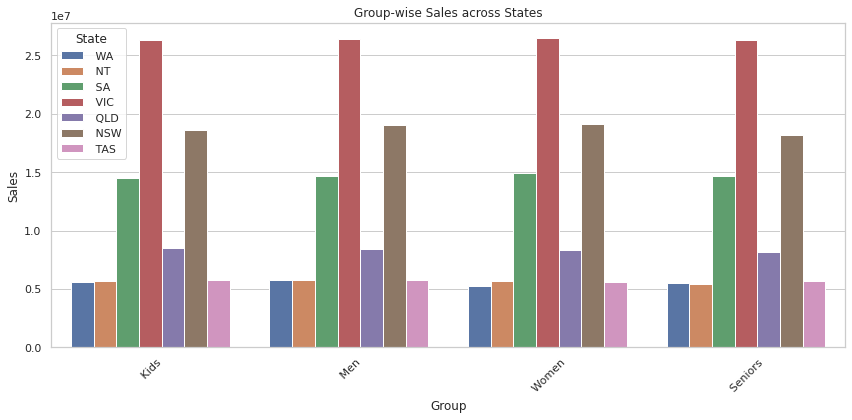

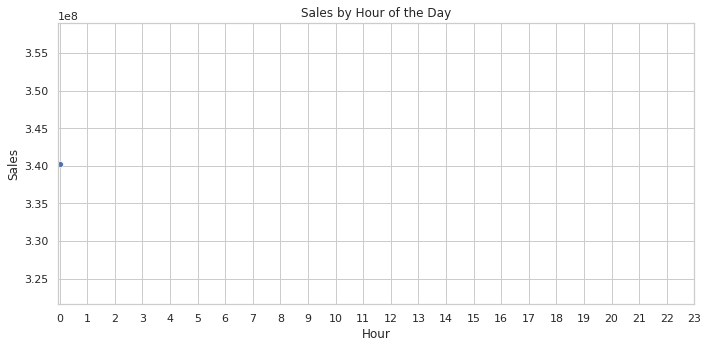

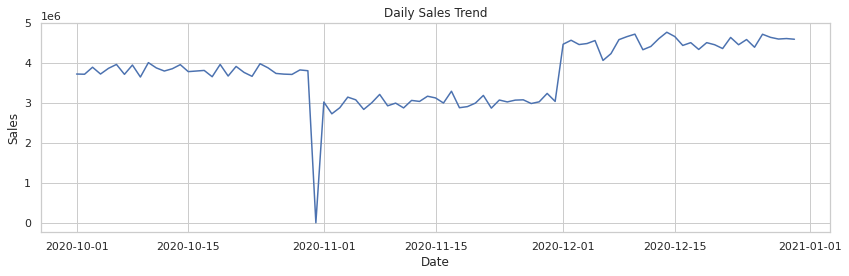

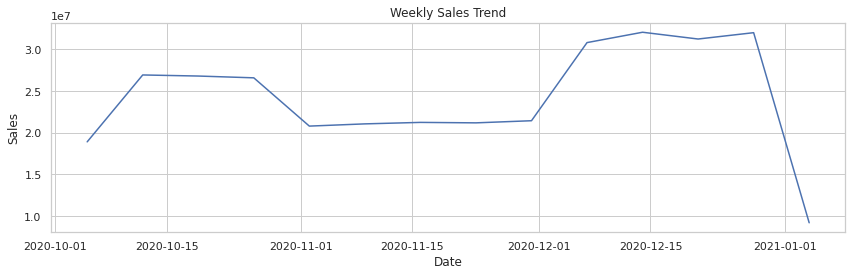

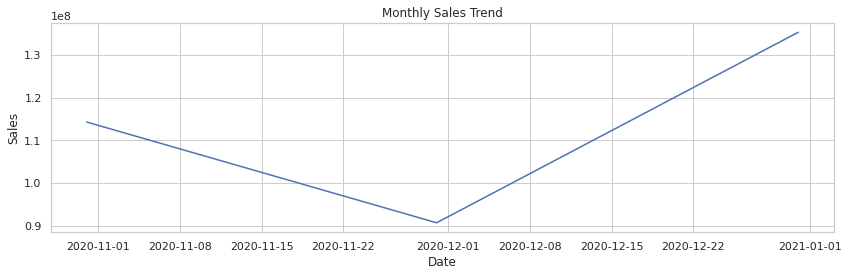

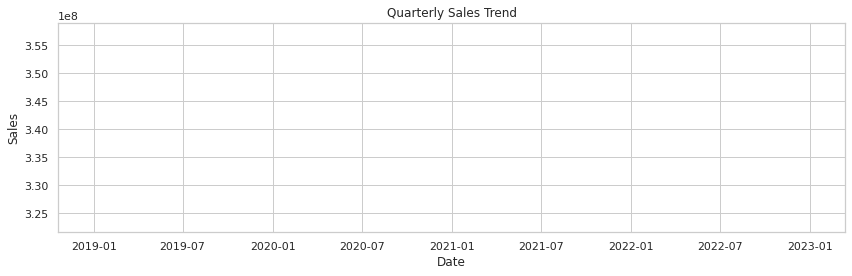

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('AusApparalSales4thQrt2020.csv')
# Check for missing values (True = missing)
print("🔍 Missing Values Summary (isna()):")
print(df.isna().sum())

# Check for non-missing (valid) data entries
print("\n✅ Non-missing value check (notna()):")
print(df.notna().sum())

# Normalization
scaler = MinMaxScaler()
df[['Sales_Normalized', 'Unit_Normalized']] = scaler.fit_transform(df[['Sales', 'Unit']])

# Show normalized sample
print(df[['Sales', 'Sales_Normalized', 'Unit', 'Unit_Normalized']].head())


# Ensure numeric columns are correctly typed
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Unit'] = pd.to_numeric(df['Unit'], errors='coerce')

# Drop rows with NaNs in 'Sales' or 'Unit'
df.dropna(subset=['Sales', 'Unit'], inplace=True)

# Calculate descriptive statistics for Sales
sales_stats = {
    'mean': df['Sales'].mean(),
    'median': df['Sales'].median(),
    'mode': df['Sales'].mode().iloc[0] if not df['Sales'].mode().empty else None,
    'std_dev': df['Sales'].std()
}

# Calculate descriptive statistics for Unit
unit_stats = {
    'mean': df['Unit'].mean(),
    'median': df['Unit'].median(),
    'mode': df['Unit'].mode().iloc[0] if not df['Unit'].mode().empty else None,
    'std_dev': df['Unit'].std()
}

# Print the results
print("Sales Statistics:")
for k, v in sales_stats.items():
    print(f"{k.title()}: {v:.2f}")

print("\nUnit Statistics:")
for k, v in unit_stats.items():
    print(f"{k.title()}: {v:.2f}")
    
# Group by 'Group' and sum the Sales
group_sales = df.groupby('Group')['Sales'].sum().reset_index()

# Identify group with highest sales
highest_sales_group = group_sales.loc[group_sales['Sales'].idxmax()]

# Identify group with lowest sales
lowest_sales_group = group_sales.loc[group_sales['Sales'].idxmin()]

# Print results
print("Total Sales by Group:\n", group_sales)
print("\nGroup with Highest Sales:")
print(highest_sales_group)
print("\nGroup with Lowest Sales:")
print(lowest_sales_group)


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure 'Sales' and 'Unit' are numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Unit'] = pd.to_numeric(df['Unit'], errors='coerce')

# Drop rows with missing important values
df.dropna(subset=['Date', 'Sales', 'Unit'], inplace=True)

# -------------------------
# WEEKLY REPORT
# -------------------------
weekly_report = df.resample('W-Mon', on='Date').agg({
    'Sales': 'sum',
    'Unit': 'sum'
}).reset_index()
weekly_report.rename(columns={'Date': 'Week'}, inplace=True)

# -------------------------
# MONTHLY REPORT
# -------------------------
monthly_report = df.resample('M', on='Date').agg({
    'Sales': 'sum',
    'Unit': 'sum'
}).reset_index()
monthly_report.rename(columns={'Date': 'Month'}, inplace=True)

# -------------------------
# QUARTERLY REPORT
# -------------------------
quarterly_report = df.resample('Q', on='Date').agg({
    'Sales': 'sum',
    'Unit': 'sum'
}).reset_index()
quarterly_report.rename(columns={'Date': 'Quarter'}, inplace=True)

# -------------------------
# Print reports
# -------------------------
print("\n Weekly Sales Report:")
print(weekly_report.head())

print("\n🗓️ Monthly Sales Report:")
print(monthly_report)

print("\n🧾 Quarterly Sales Report:")
print(quarterly_report)

# Load data (assuming df is already loaded with 'Sales', 'Date', 'State', 'Group' columns)
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour

# -------------------- Time-based Aggregates --------------------
daily_sales = df.resample('D', on='Date')['Sales'].sum().reset_index()
weekly_sales = df.resample('W-Mon', on='Date')['Sales'].sum().reset_index()
monthly_sales = df.resample('M', on='Date')['Sales'].sum().reset_index()
quarterly_sales = df.resample('Q', on='Date')['Sales'].sum().reset_index()
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()

# Set style
sns.set(style="whitegrid")

# -------------------- 1. State-wise Sales by Group --------------------
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', estimator=np.sum, errorbar=None)
plt.title('State-wise Sales by Demographic Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------- 2. Group-wise Sales across States --------------------
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Group', y='Sales', hue='State', estimator=np.sum, errorbar=None)
plt.title('Group-wise Sales across States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------- 3. Time-of-Day Sales --------------------
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_sales, x='Hour', y='Sales', marker='o')
plt.title('Sales by Hour of the Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# -------------------- 4. Daily Sales Trend --------------------
plt.figure(figsize=(12, 4))
sns.lineplot(data=daily_sales, x='Date', y='Sales')
plt.title('Daily Sales Trend')
plt.tight_layout()
plt.show()

# -------------------- 5. Weekly Sales Trend --------------------
plt.figure(figsize=(12, 4))
sns.lineplot(data=weekly_sales, x='Date', y='Sales')
plt.title('Weekly Sales Trend')
plt.tight_layout()
plt.show()

# -------------------- 6. Monthly Sales Trend --------------------
plt.figure(figsize=(12, 4))
sns.lineplot(data=monthly_sales, x='Date', y='Sales')
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()

# -------------------- 7. Quarterly Sales Trend --------------------
plt.figure(figsize=(12, 4))
sns.lineplot(data=quarterly_sales, x='Date', y='Sales')
plt.title('Quarterly Sales Trend')
plt.tight_layout()
plt.show()









